## Vainishi vya vyakula 1

Katika somo hili, tutachunguza aina mbalimbali za vainishi ili *kutabiri aina ya chakula cha kitaifa kulingana na kikundi cha viungo.* Wakati wa kufanya hivyo, tutajifunza zaidi kuhusu baadhi ya njia ambazo algorithimu zinaweza kutumika kwa kazi za uainishaji.

### [**Jaribio la kabla ya somo**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **Maandalizi**

Somo hili linajengwa juu ya [somo letu la awali](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) ambapo tulifanya yafuatayo:

-   Tulifanya utangulizi rahisi wa uainishaji kwa kutumia seti ya data kuhusu vyakula vyote vya kuvutia vya Asia na India 😋.

-   Tulichunguza baadhi ya [vitenzi vya dplyr](https://dplyr.tidyverse.org/) ili kuandaa na kusafisha data yetu.

-   Tulitengeneza taswira nzuri kwa kutumia ggplot2.

-   Tulionyesha jinsi ya kushughulikia data isiyo na uwiano kwa kuisafisha kwa kutumia [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html).

-   Tulionyesha jinsi ya `prep` na `bake` mapishi yetu ili kuthibitisha kuwa yatafanya kazi kama inavyotarajiwa.

#### **Mahitaji ya awali**

Kwa somo hili, tutahitaji vifurushi vifuatavyo ili kusafisha, kuandaa, na kutazama data yetu:

-   `tidyverse`: [Tidyverse](https://www.tidyverse.org/) ni [mkusanyiko wa vifurushi vya R](https://www.tidyverse.org/packages) vilivyoundwa kufanya sayansi ya data kuwa ya haraka, rahisi, na ya kufurahisha!

-   `tidymodels`: Mfumo wa [tidymodels](https://www.tidymodels.org/) ni [mkusanyiko wa vifurushi](https://www.tidymodels.org/packages/) kwa ajili ya uundaji wa mifano na ujifunzaji wa mashine.

-   `themis`: [Themis package](https://themis.tidymodels.org/) hutoa Hatua za Ziada za Mapishi kwa Kushughulikia Data Isiyo na Uwiano.

-   `nnet`: [Nnet package](https://cran.r-project.org/web/packages/nnet/nnet.pdf) hutoa kazi za kukadiria mitandao ya neva ya kulisha mbele yenye safu moja ya siri, na kwa mifano ya uratibu wa kimantiki wa multinomial.

Unaweza kuvisakinisha kama:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

Vinginevyo, maandishi yaliyo hapa chini yanakagua kama una pakiti zinazohitajika kukamilisha moduli hii na kuyasakinisha kwako endapo hazipo.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. Gawanya data kuwa seti za mafunzo na majaribio.

Tutaanza kwa kuchagua hatua chache kutoka somo letu la awali.

### Ondoa viungo vya kawaida zaidi vinavyosababisha mkanganyiko kati ya vyakula tofauti, kwa kutumia `dplyr::select()`.

Kila mtu anapenda mchele, vitunguu saumu na tangawizi!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 indian  0      0        0     0          0     0            0       0       
2 indian  1      0        0     0          0     0            0       0       
3 indian  0      0        0     0          0     0            0       0       
4 indian  0      0        0     0          0     0            0       0       
5 indian  0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       0    0   
2 0         ⋯ 0       0           0          0                       0    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     1      0

cuisine  n  
1 korean   799
2 indian   598
3 chinese  442
4 japanese 320
5 thai     289

Sawa! Sasa, ni wakati wa kugawanya data ambapo 70% ya data itaenda kwa mafunzo na 30% itaenda kwa majaribio. Pia tutatumia mbinu ya `stratification` wakati wa kugawanya data ili `kuweka uwiano wa kila aina ya chakula` katika seti za mafunzo na uthibitisho.

[rsample](https://rsample.tidymodels.org/), kifurushi katika Tidymodels, kinatoa miundombinu kwa ajili ya kugawanya data na kurudia kwa ufanisi:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 chinese 0      0        0     0          0     0            0       0       
2 chinese 0      0        0     0          0     0            0       0       
3 chinese 0      0        0     0          0     0            0       0       
4 chinese 0      0        0     0          0     0            0       0       
5 chinese 0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       1    0   
2 0         ⋯ 0       0           0          0                       1    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     0      0

cuisine  n  
1 korean   559
2 indian   418
3 chinese  309
4 japanese 224
5 thai     202

## 2. Kushughulikia data isiyo na uwiano

Kama ulivyogundua kwenye seti ya data ya awali pamoja na seti yetu ya mafunzo, kuna usambazaji usio sawa kabisa katika idadi ya vyakula. Vyakula vya Kikorea ni *karibu* mara 3 ya vyakula vya Kithai. Data isiyo na uwiano mara nyingi ina athari mbaya kwenye utendaji wa modeli. Modeli nyingi hufanya kazi vizuri zaidi pale ambapo idadi ya uchunguzi ni sawa, na kwa hivyo huwa na changamoto wanapokutana na data isiyo na uwiano.

Kuna njia kuu mbili za kushughulikia seti za data zisizo na uwiano:

-   kuongeza uchunguzi kwenye darasa lenye idadi ndogo: `Over-sampling` kwa mfano kutumia algoriti ya SMOTE ambayo huzalisha mifano mipya ya darasa lenye idadi ndogo kwa kutumia majirani wa karibu wa kesi hizo.

-   kuondoa uchunguzi kutoka darasa lenye idadi kubwa: `Under-sampling`

Katika somo letu la awali, tulionyesha jinsi ya kushughulikia seti za data zisizo na uwiano kwa kutumia `recipe`. Recipe inaweza kufikiriwa kama mpango unaoelezea hatua gani zinapaswa kutumika kwenye seti ya data ili kuifanya iwe tayari kwa uchambuzi wa data. Katika hali yetu, tunataka kuwa na usambazaji sawa wa idadi ya vyakula vyetu kwa `training set` yetu. Hebu tuingie moja kwa moja.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

Unaweza kuthibitisha (kwa kutumia prep+bake) kwamba mapishi yatafanya kazi kama unavyotarajia - lebo zote za vyakula zikiwa na uchunguzi `559`.

Kwa kuwa tutatumia mapishi haya kama sehemu ya maandalizi ya uundaji wa modeli, `workflow()` itafanya maandalizi na kuoka kwa ajili yetu, kwa hivyo hatutalazimika kukadiria mapishi kwa mikono.

Sasa tuko tayari kufundisha modeli 👩‍💻👨‍💻!

## 3. Kuchagua kiondoaji wako

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>Sanaa na @allison_horst</figcaption>


Sasa tunapaswa kuamua ni algoriti gani ya kutumia kwa kazi hii 🤔.

Katika Tidymodels, [`parsnip package`](https://parsnip.tidymodels.org/index.html) hutoa kiolesura thabiti cha kufanya kazi na mifano kupitia injini tofauti (pakiti). Tafadhali angalia nyaraka za parsnip ili kuchunguza [aina za mifano na injini](https://www.tidymodels.org/find/parsnip/#models) pamoja na [hoja za mifano](https://www.tidymodels.org/find/parsnip/#model-args) zinazohusiana. Aina mbalimbali zinaweza kuonekana kuwa nyingi mwanzoni. Kwa mfano, mbinu zifuatazo zote zinajumuisha mbinu za uainishaji:

-   C5.0 Mifano ya Uainishaji Inayotegemea Kanuni

-   Mifano ya Uainishaji Inayobadilika

-   Mifano ya Uainishaji wa Mstari

-   Mifano ya Uainishaji wa Kawaida

-   Mifano ya Usawazishaji wa Kilogistiki

-   Mifano ya Usawazishaji wa Multinomial

-   Mifano ya Naive Bayes

-   Mashine za Msaada wa Vector

-   Majirani wa Karibu

-   Miti ya Maamuzi

-   Mbinu za Ensemble

-   Mitandao ya Neva

Orodha inaendelea!

### **Ni uainishaji gani wa kuchagua?**

Kwa hivyo, ni uainishaji gani unapaswa kuchagua? Mara nyingi, kujaribu kadhaa na kutafuta matokeo mazuri ni njia ya kupima.

> AutoML hutatua tatizo hili kwa urahisi kwa kuendesha kulinganisha hizi mtandaoni, ikikuruhusu kuchagua algoriti bora kwa data yako. Jaribu hapa [hapa](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

Pia, chaguo la uainishaji linategemea tatizo letu. Kwa mfano, wakati matokeo yanaweza kugawanywa katika `madaraja zaidi ya mawili`, kama ilivyo katika kesi yetu, lazima utumie `algoriti ya uainishaji wa madaraja mengi` badala ya `uainishaji wa binary.`

### **Njia bora zaidi**

Njia bora zaidi kuliko kubahatisha kiholela, hata hivyo, ni kufuata mawazo yaliyo kwenye [ML Cheat sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) inayoweza kupakuliwa. Hapa, tunagundua kwamba, kwa tatizo letu la madaraja mengi, tuna chaguo kadhaa:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>Sehemu ya Karatasi ya Udanganyifu ya Microsoft, ikionyesha chaguo za uainishaji wa madaraja mengi</figcaption>


### **Mantiki**

Tujaribu kufikiria njia tofauti za kutatua tatizo hili tukizingatia vikwazo tulivyo navyo:

-   **Mitandao ya neva yenye kina ni nzito sana**. Kwa dataset yetu safi lakini ndogo, na kwa kuwa tunafanya mafunzo kwa ndani kupitia notebooks, mitandao ya neva yenye kina ni nzito sana kwa kazi hii.

-   **Hakuna classifier ya darasa mbili**. Hatutumii classifier ya darasa mbili, kwa hivyo hiyo inatupilia mbali mbinu ya one-vs-all.

-   **Mti wa maamuzi au regression ya logistic inaweza kufanya kazi**. Mti wa maamuzi unaweza kufanya kazi, au regression ya multinomial/regression ya logistic ya darasa nyingi kwa data ya darasa nyingi.

-   **Multiclass Boosted Decision Trees hutatua tatizo tofauti**. Multiclass boosted decision tree inafaa zaidi kwa kazi zisizo za parametric, kwa mfano kazi zinazolenga kujenga rankings, kwa hivyo siyo muhimu kwetu.

Pia, kwa kawaida kabla ya kuanza kutumia mifano ya machine learning yenye ugumu zaidi kama ensemble methods, ni wazo zuri kujenga mfano rahisi iwezekanavyo ili kupata wazo la kinachoendelea. Kwa somo hili, tutaanza na mfano wa `multinomial regression`.

> Regression ya logistic ni mbinu inayotumika pale ambapo variable ya matokeo ni ya kikundi (au nominal). Kwa Binary logistic regression idadi ya variable za matokeo ni mbili, ilhali idadi ya variable za matokeo kwa multinomial logistic regression ni zaidi ya mbili. Tazama [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) kwa maelezo zaidi.

## 4. Kufundisha na kutathmini mfano wa Multinomial logistic regression.

Katika Tidymodels, `parsnip::multinom_reg()`, inafafanua mfano unaotumia predictors za linear kutabiri data ya darasa nyingi kwa kutumia usambazaji wa multinomial. Tazama `?multinom_reg()` kwa njia tofauti/engines unazoweza kutumia kufit mfano huu.

Kwa mfano huu, tutafit mfano wa Multinomial regression kupitia engine ya default [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf).

> Nilichagua thamani ya `penalty` kwa njia ya nasibu. Kuna njia bora za kuchagua thamani hii, yaani, kwa kutumia `resampling` na `tuning` ya mfano ambayo tutajadili baadaye.
>
> Tazama [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) ikiwa unataka kujifunza zaidi kuhusu jinsi ya kurekebisha hyperparameters za mfano.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Kazi nzuri 🥳! Sasa kwa kuwa tuna mapishi na maelezo ya mfano, tunahitaji kupata njia ya kuyafunga pamoja katika kitu ambacho kwanza kitaandaa data, kisha kufitisha mfano kwenye data iliyotayarishwa, na pia kuruhusu shughuli za baada ya usindikaji. Katika Tidymodels, kitu hiki rahisi kinaitwa [`workflow`](https://workflows.tidymodels.org/) na kwa urahisi huhifadhi vipengele vyako vya uundaji wa mifano! Hiki ndicho tungeita *pipelines* katika *Python*.

Sasa hebu tufunge kila kitu kwenye workflow!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Mtiririko wa kazi 👌👌! **`workflow()`** inaweza kutumika kwa njia sawa na jinsi mfano unavyoweza kutumika. Kwa hivyo, ni wakati wa kufundisha mfano!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

Matokeo yanaonyesha vigezo ambavyo modeli ilijifunza wakati wa mafunzo.

### Tathmini Modeli Iliyofunzwa

Ni wakati wa kuona jinsi modeli ilivyofanya kazi 📏 kwa kuitathmini kwenye seti ya majaribio! Hebu tuanze kwa kufanya utabiri kwenye seti ya majaribio.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine .pred_class
1 indian  thai       
2 indian  indian     
3 indian  indian     
4 indian  indian     
5 indian  indian

Kazi nzuri! Katika Tidymodels, kutathmini utendaji wa modeli kunaweza kufanywa kwa kutumia [yardstick](https://yardstick.tidymodels.org/) - kifurushi kinachotumika kupima ufanisi wa modeli kwa kutumia vipimo vya utendaji. Kama tulivyofanya katika somo letu la usanjari wa kimantiki, hebu tuanze kwa kuhesabu matriki ya kuchanganya.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

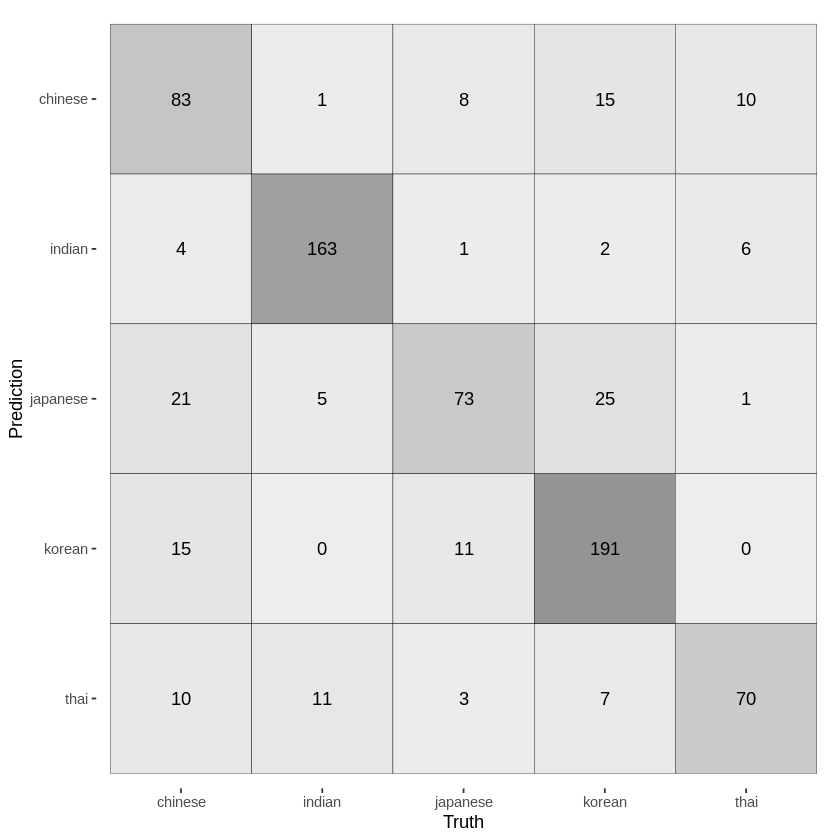

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

Mraba za giza kwenye mchoro wa matriki ya mkanganyiko zinaonyesha idadi kubwa ya kesi, na unaweza kuona mstari wa diagonal wa mraba za giza unaoonyesha kesi ambapo lebo iliyotabiriwa na lebo halisi ni sawa.

Sasa hebu tuhifadhi takwimu za muhtasari kwa matriki ya mkanganyiko.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric              .estimator .estimate
1  accuracy             multiclass 0.7880435
2  kap                  multiclass 0.7276583
3  sens                 macro      0.7780927
4  spec                 macro      0.9477598
5  ppv                  macro      0.7585583
6  npv                  macro      0.9460080
7  mcc                  multiclass 0.7292724
8  j_index              macro      0.7258524
9  bal_accuracy         macro      0.8629262
10 detection_prevalence macro      0.2000000
11 precision            macro      0.7585583
12 recall               macro      0.7780927
13 f_meas               macro      0.7641862

Ikiwa tutazingatia vipimo kama vile usahihi, unyeti, na ppv, hatuko mbali sana kwa mwanzo mzuri 🥳!

## 4. Kuchunguza Kwa Undani

Hebu tujiulize swali moja la kina: Ni vigezo gani vinavyotumika kuamua aina fulani ya chakula kama matokeo yaliyotabiriwa?

Kweli, algoriti za kujifunza kwa mashine za takwimu, kama vile logistic regression, zinategemea `uwezekano`; kwa hivyo kinachotabiriwa na classifier kwa kweli ni mgawanyo wa uwezekano juu ya seti ya matokeo yanayowezekana. Darasa lenye uwezekano wa juu zaidi ndilo huchaguliwa kama matokeo yanayowezekana zaidi kwa uchunguzi uliotolewa.

Hebu tuone hili likifanyika kwa kufanya utabiri wa madarasa madhubuti na uwezekano.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine .pred_class .pred_chinese .pred_indian .pred_japanese .pred_korean
1 indian  thai        1.551259e-03  0.4587877    5.988039e-04   2.428503e-04
2 indian  indian      2.637133e-05  0.9999488    6.648651e-07   2.259993e-05
3 indian  indian      1.049433e-03  0.9909982    1.060937e-03   1.644947e-05
4 indian  indian      6.237482e-02  0.4763035    9.136702e-02   3.660913e-01
5 indian  indian      1.431745e-02  0.9418551    2.945239e-02   8.721782e-03
  .pred_thai  
1 5.388194e-01
2 1.577948e-06
3 6.874989e-03
4 3.863391e-03
5 5.653283e-03

Kwa nini mfano una uhakika kwamba uchunguzi wa kwanza ni wa Kithai?

## **🚀Changamoto**

Katika somo hili, ulitumia data yako iliyosafishwa kujenga mfano wa mashine unaoweza kutabiri aina ya chakula cha kitaifa kulingana na mfululizo wa viungo. Chukua muda kusoma [chaguzi nyingi](https://www.tidymodels.org/find/parsnip/#models) zinazotolewa na Tidymodels ili kuainisha data na [njia nyingine](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) za kufanikisha multinomial regression.

#### SHUKRANI KWA:

[`Allison Horst`](https://twitter.com/allison_horst/) kwa kuunda michoro ya kushangaza inayofanya R kuwa ya kuvutia na ya kirafiki zaidi. Tafuta michoro zaidi kwenye [galeria yake](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM).

[Cassie Breviu](https://www.twitter.com/cassieview) na [Jen Looper](https://www.twitter.com/jenlooper) kwa kuunda toleo la awali la Python la moduli hii ♥️

<br>
Ningetupa vichekesho lakini sijaelewa utani wa chakula 😅.

<br>

Jifunze kwa furaha,

[Eric](https://twitter.com/ericntay), Balozi wa Dhahabu wa Wanafunzi wa Microsoft Learn.



---

**Kanusho**:  
Hati hii imetafsiriwa kwa kutumia huduma ya tafsiri ya AI [Co-op Translator](https://github.com/Azure/co-op-translator). Ingawa tunajitahidi kwa usahihi, tafadhali fahamu kuwa tafsiri za kiotomatiki zinaweza kuwa na makosa au kutokuwa sahihi. Hati ya asili katika lugha yake ya awali inapaswa kuzingatiwa kama chanzo cha mamlaka. Kwa taarifa muhimu, inashauriwa kutumia tafsiri ya kitaalamu ya binadamu. Hatutawajibika kwa maelewano mabaya au tafsiri zisizo sahihi zinazotokana na matumizi ya tafsiri hii.
